In [1]:
import warnings
import os
from math import sqrt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.externals import joblib
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from bidi import algorithm as bidialg
from io import BytesIO
import base64

%matplotlib inline

warnings.filterwarnings("ignore")

In [2]:
try:
    df = pd.read_csv("data/data_deals_done.csv")
    print(df.columns)
    print(df.shape)
except Exception:
    print("Seems we have a problem")

Index(['_id', 'sale_day', 'address', 'property_type', 'rooms_number', 'floor',
       'build_year', 'building_mr', 'city', 'street', 'street_number',
       'neighborhood', 'address_area', 'address_neighborhood', 'sale_day_year',
       'sale_day_month', 'final_price'],
      dtype='object')
(304431, 17)


In [3]:
used_features = [
    'street', 
    'neighborhood',
    'property_type', 
    'rooms_number', 
    'floor',
    'build_year', 
    'building_mr',
    'city',
    'sale_day_year'
]

In [4]:
#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


In [5]:
X = df[used_features]
y = df['final_price']


In [6]:
# cities = [
#     "תל אביב יפו",
#     "חיפה",
#     "באר שבע",
#     "ירושלים",
#     "פתח תקווה",
#     "אשדוד",
#     "אשקלון",
#     "נתניה",
#     "ראשון לציון",
#     "חולון",
#     "רמת גן",
#     "בת ים",
#     "רחובות",
#     "חדרה",
#     "נהריה",
#     "אילת",
#     "קרית אתא",
#     "עפולה",
#     "בני ברק",
#     "לוד"
# ]
cities = df['city'].unique()

test_size = 0.3

cities = {city: {"processor": None, "algo": None, "mse": None, "fig": None} for city in cities if '/' not in city}

print("Total number of cities is:", len(cities))


Total number of cities is: 95


In [7]:

# for city in cities.keys():
#     print(city)
#     _df = df.loc[(df['city'] == city)]
    
#     _df = remove_outlier(_df, 'final_price')
    
#     print(_df.shape)
#     X = _df[used_features]
#     y = _df['final_price']
    
#     min_max_scalar = preprocessing.MinMaxScaler()
#     y = min_max_scalar.fit_transform(np.array(y).reshape(-1, 1))
#     y = pd.DataFrame(y)

#     ohe = preprocessing.OneHotEncoder()
#     X = ohe.fit_transform(X)
#     print(X.shape)
    
#     # TODO: don't use, it takes too much time to estimate
#     # poly = preprocessing.PolynomialFeatures(2, interaction_only=True, include_bias=False)
#     # X = poly.fit_transform(X)
#     # print(datetime.now())
#     # print(X.shape)

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)
    
#     lm = LinearRegression()
#     lm.fit(X_train, y_train)

#     predictions = lm.predict(X_test)
#     plt.scatter(y_test, predictions, s=5)
#     plt.title(bidialg.get_display(city))
#     plt.xlabel('Y Test')
#     plt.ylabel('Predicted Y')

#     plt.gca().set_aspect('equal', adjustable='box')
#     plt.show()
#     # The mean squared error
#     print("Mean squared error: %.2f" % mean_squared_error(y_test, predictions))
#     print("Mean squared error sqrt:", sqrt(mean_squared_error(y_test, predictions)))
#     # Explained variance score: 1 is perfect prediction
#     print('Variance score: %.2f' % r2_score(y_test, predictions))

תל אביב יפו
Score: 0.7051
MSE sqrt: 593674.5945


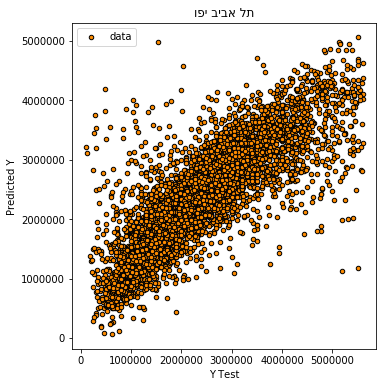

ראשון לציון
Score: 0.8404
MSE sqrt: 182884.7118


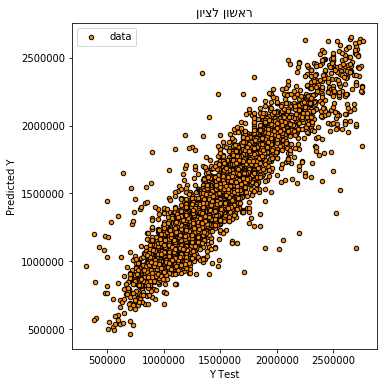

רעננה
Score: 0.6995
MSE sqrt: 356708.8442


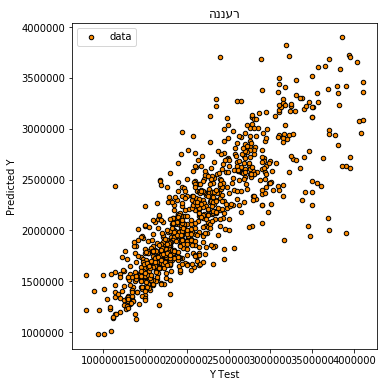

פתח תקווה
Score: 0.8583
MSE sqrt: 175765.9691


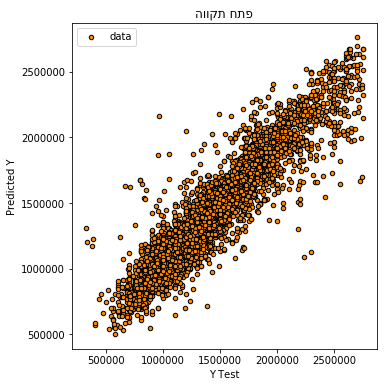

הרצליה
Score: 0.7127
MSE sqrt: 428985.7819


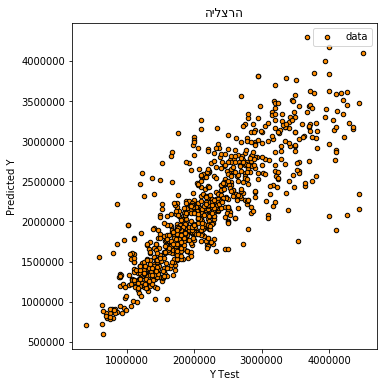

גבעתיים
Score: 0.8075
MSE sqrt: 340617.3737


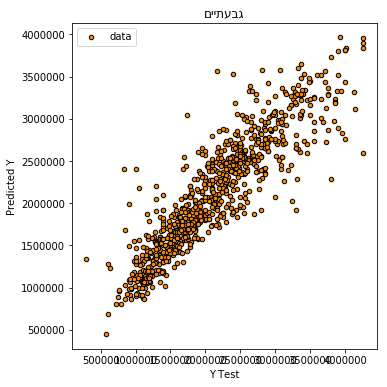

רמת גן
Score: 0.7739
MSE sqrt: 255958.2220


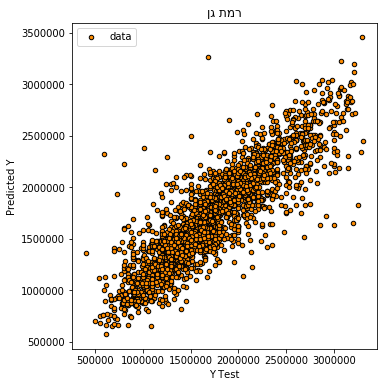

ירושלים
Score: 0.7639
MSE sqrt: 276441.4725


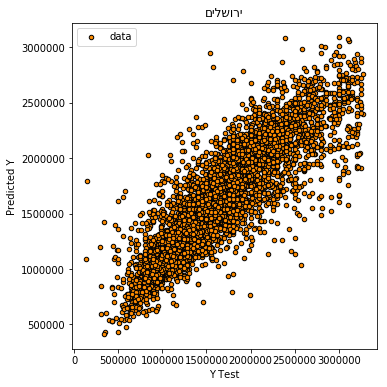

הוד השרון
Score: 0.8045
MSE sqrt: 253588.7319


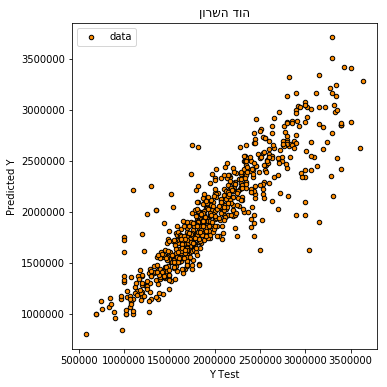

אזור
Score: 0.8559
MSE sqrt: 204345.1010


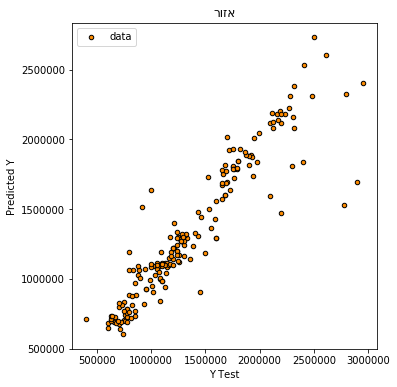

סביון
Score: 0.0000
MSE sqrt: 7590374.5997


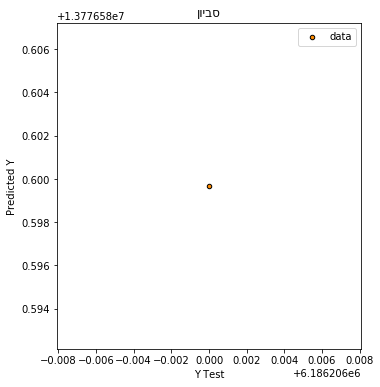

פרדס חנה כרכור
Score: 0.8377
MSE sqrt: 188514.9188


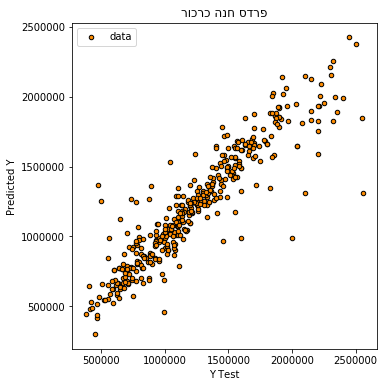

נס ציונה
Score: 0.7731
MSE sqrt: 269529.2986


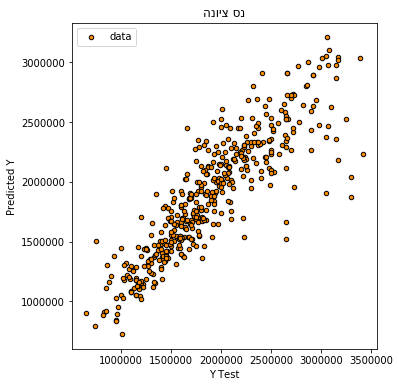

זכרון יעקב
Score: 0.8378
MSE sqrt: 304589.2682


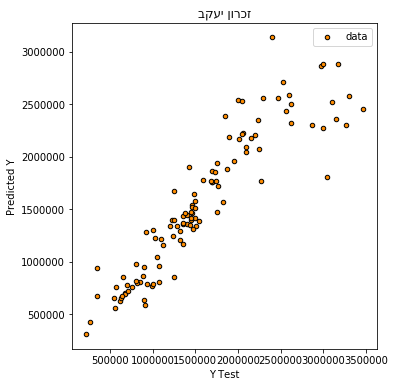

כפר יונה
Score: 0.8069
MSE sqrt: 148600.5124


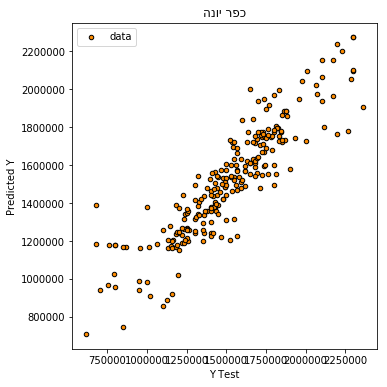

גדרה
Score: 0.7832
MSE sqrt: 172200.3487


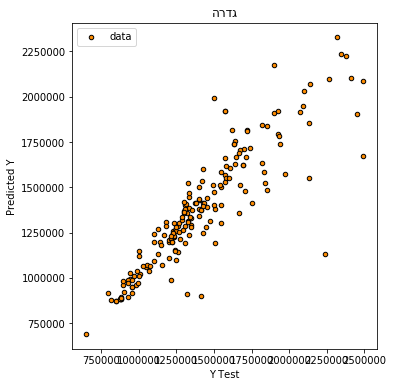

חיפה
Score: 0.8423
MSE sqrt: 197585.3737


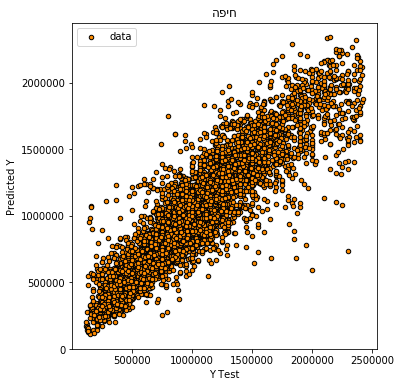

חולון
Score: 0.8595
MSE sqrt: 178115.5064


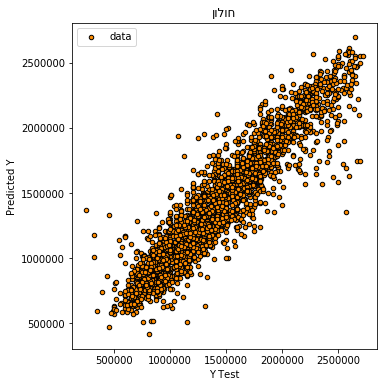

רמת ישי
Score: 0.2313
MSE sqrt: 371673.1072


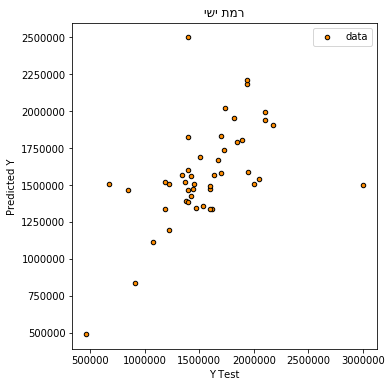

גן יבנה
Score: 0.4162
MSE sqrt: 582267.4260


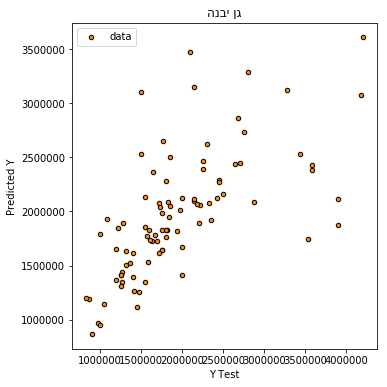

אבן יהודה
Score: -0.5624
MSE sqrt: 3293767.8182


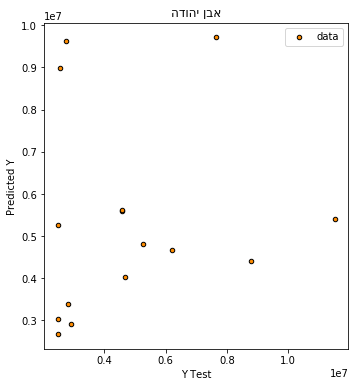

כפר סבא
Score: 0.7854
MSE sqrt: 233753.3266


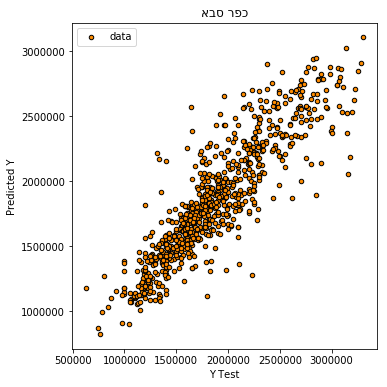

מבשרת ציון
Score: 0.7942
MSE sqrt: 318985.7467


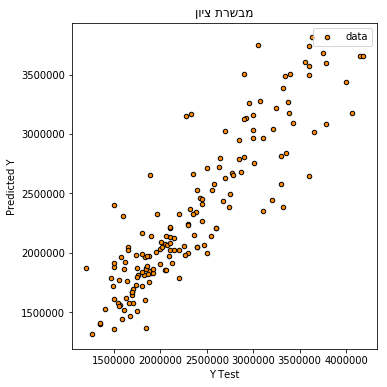

בני ברק
Score: 0.7760
MSE sqrt: 169840.8884


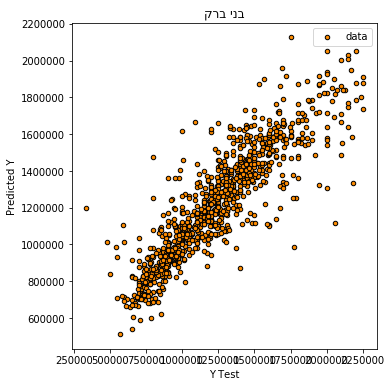

נתניה
Score: 0.8484
MSE sqrt: 217321.9886


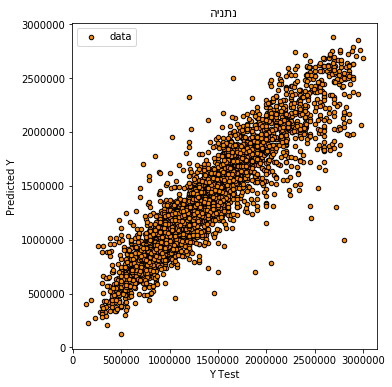

רחובות
Score: 0.8321
MSE sqrt: 162453.5395


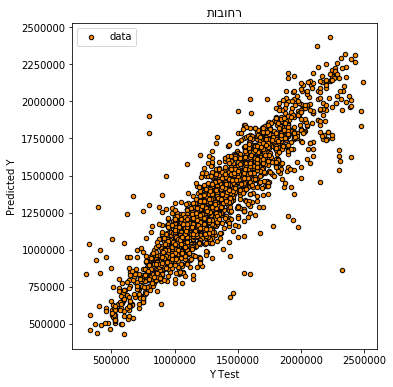

מזכרת בתיה
Score: 0.8481
MSE sqrt: 206975.4207


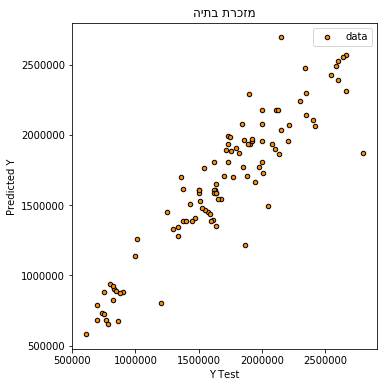

רמת השרון
Score: 0.7434
MSE sqrt: 454953.3604


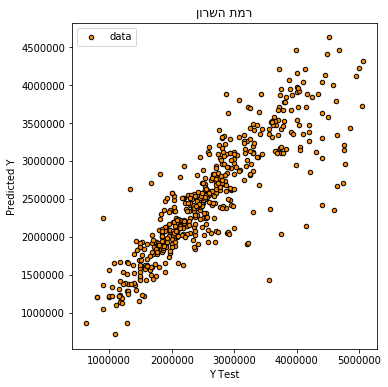

בת ים
Score: 0.8065
MSE sqrt: 198777.5511


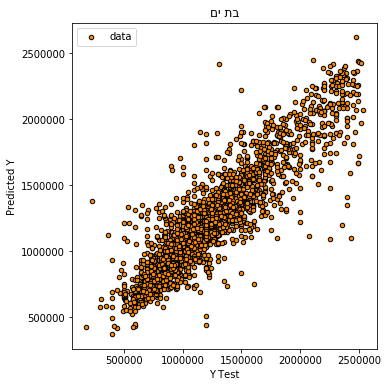

בנימינה גבעת עדה
Score: 0.3598
MSE sqrt: 515822.0270


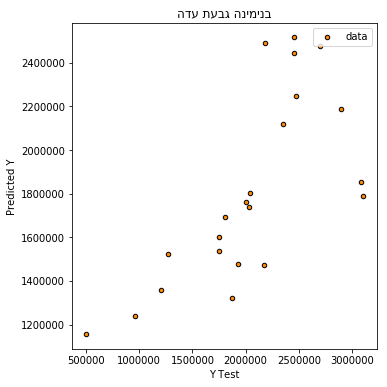

באר יעקב
Score: 0.8312
MSE sqrt: 141864.7611


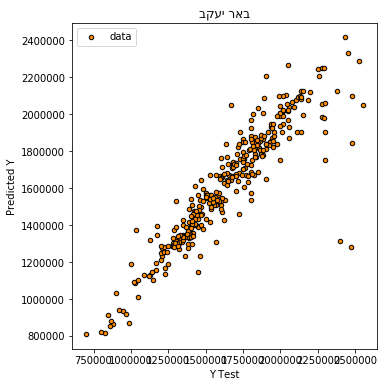

צפת
Score: 0.7217
MSE sqrt: 128751.8517


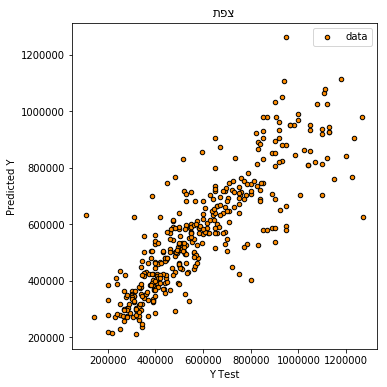

תל מונד
Score: 0.5695
MSE sqrt: 445469.7177


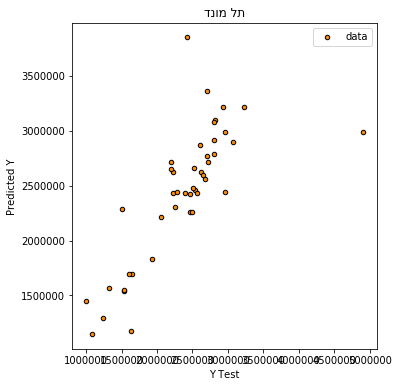

נהריה
Score: 0.8442
MSE sqrt: 146512.4247


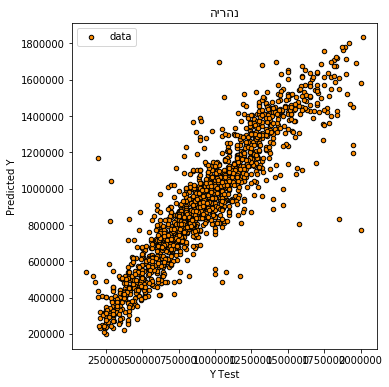

עפולה
Score: 0.8389
MSE sqrt: 107351.9254


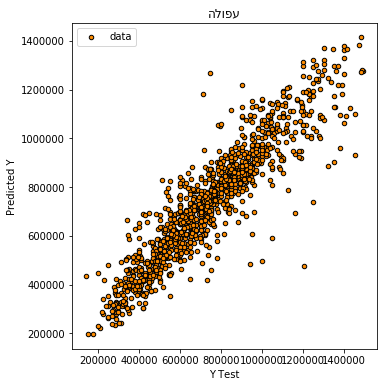

קרית אתא
Score: 0.8387
MSE sqrt: 165429.1358


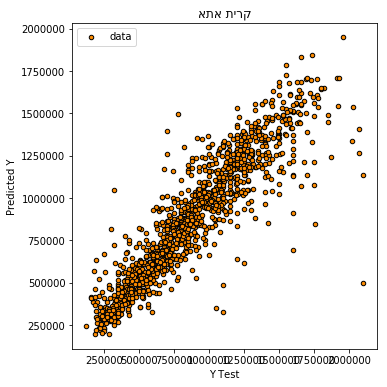

קרית ביאליק
Score: 0.8186
MSE sqrt: 155441.6841


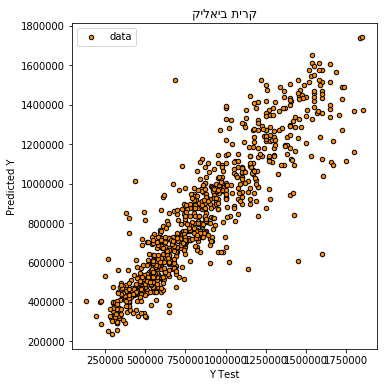

שוהם
Score: 0.6922
MSE sqrt: 311324.2540


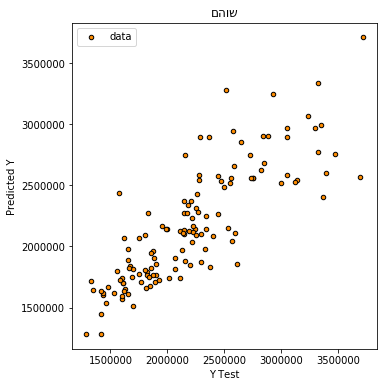

גבעת שמואל
Score: 0.8222
MSE sqrt: 257964.3779


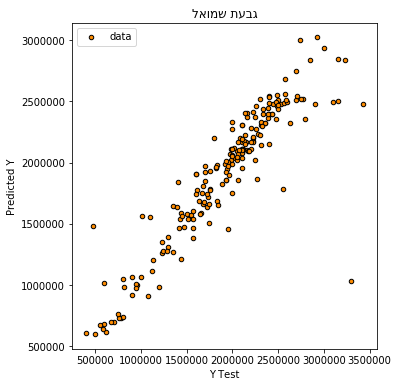

חדרה
Score: 0.8112
MSE sqrt: 158477.7907


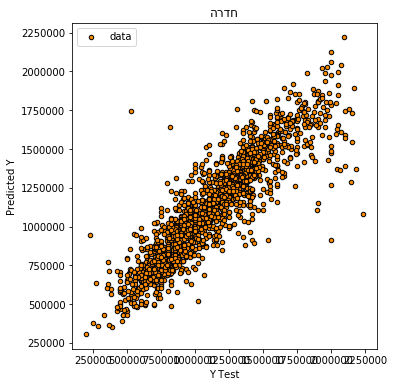

טבריה
Score: 0.8029
MSE sqrt: 138833.6994


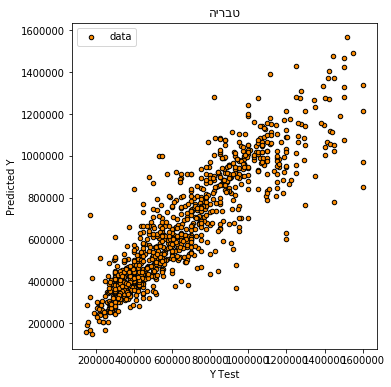

ראש העין
Score: 0.6926
MSE sqrt: 187150.7056


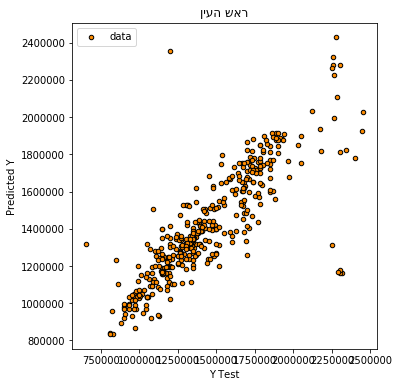

רמלה
Score: 0.8587
MSE sqrt: 161173.1906


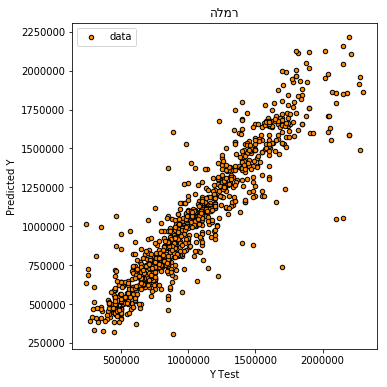

אשדוד
Score: 0.8336
MSE sqrt: 184491.0631


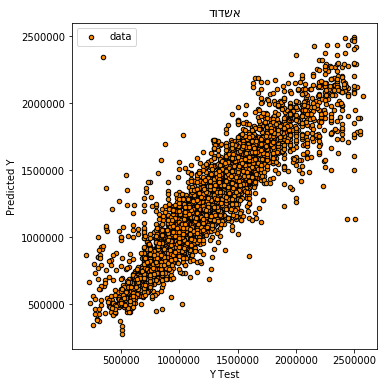

יהוד מונוסון
Score: 0.8247
MSE sqrt: 213594.8614


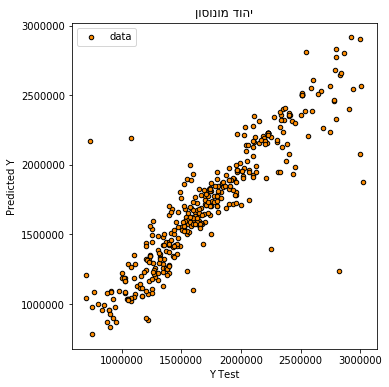

אשקלון
Score: 0.8694
MSE sqrt: 127230.5474


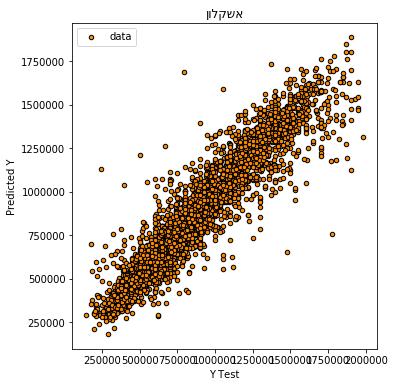

קיסריה
Score: 0.6932
MSE sqrt: 1100829.7953


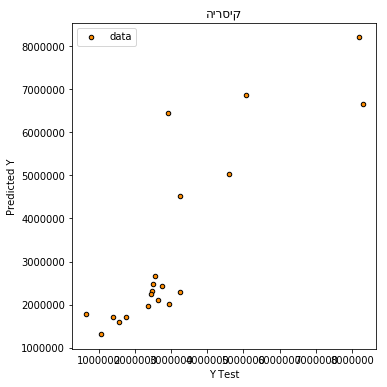

קרית מלאכי
Score: 0.8440
MSE sqrt: 120007.4941


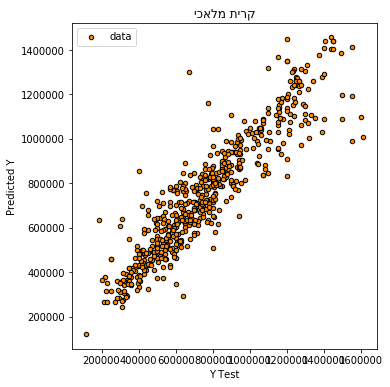

אריאל
Score: 0.7220
MSE sqrt: 134004.1113


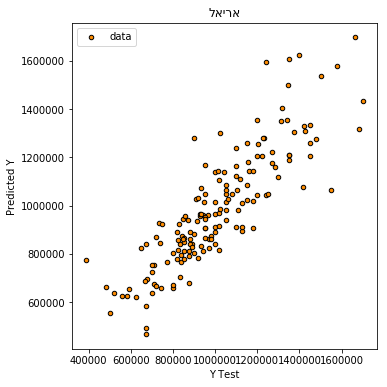

אילת
Score: 0.8404
MSE sqrt: 140682.6255


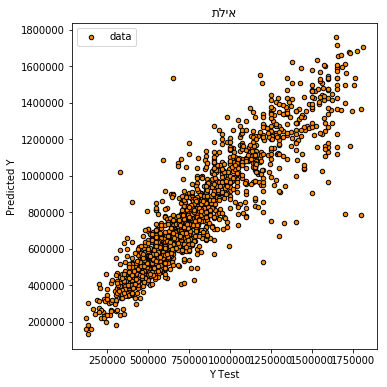

אור עקיבא
Score: 0.8175
MSE sqrt: 158591.0412


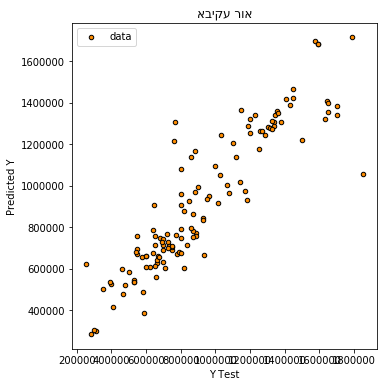

כפר תבור
Score: 0.2686
MSE sqrt: 802246.3510


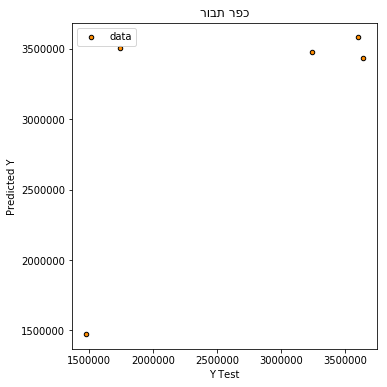

קרית אונו
Score: 0.8087
MSE sqrt: 271105.6610


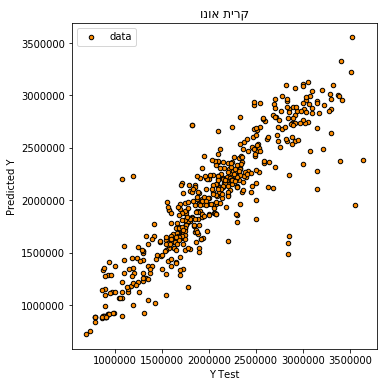

קדימה צורן
Score: 0.8130
MSE sqrt: 248205.9194


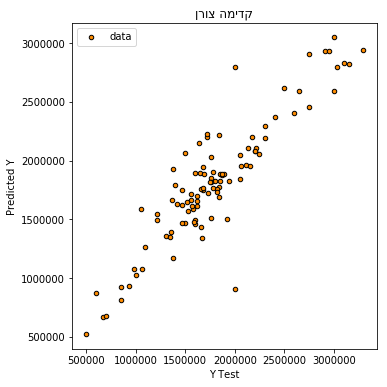

לוד
Score: 0.8371
MSE sqrt: 119630.3826


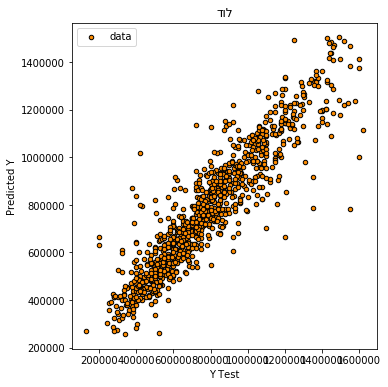

קרית גת
Score: 0.8505
MSE sqrt: 115996.8759


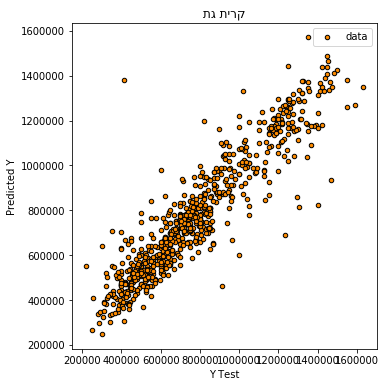

גני תקווה
Score: 0.8343
MSE sqrt: 286069.2398


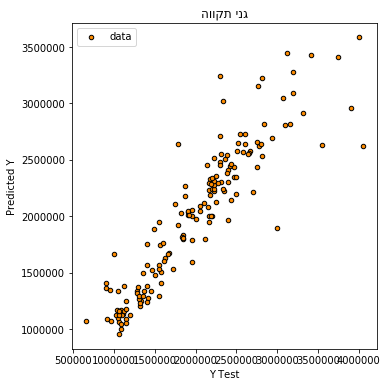

יבנה
Score: 0.8698
MSE sqrt: 159276.6181


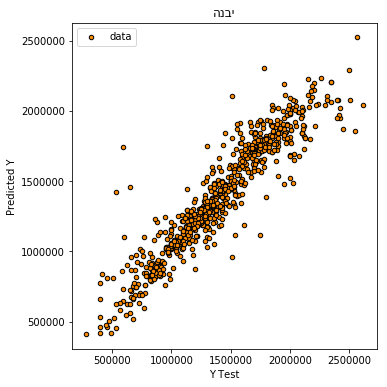

צור הדסה
Score: 0.7685
MSE sqrt: 203185.1610


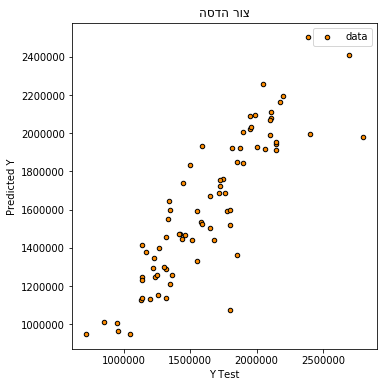

קרית מוצקין
Score: 0.8477
MSE sqrt: 158031.5093


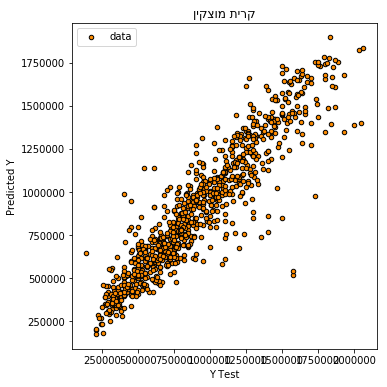

עכו
Score: 0.8549
MSE sqrt: 121274.2773


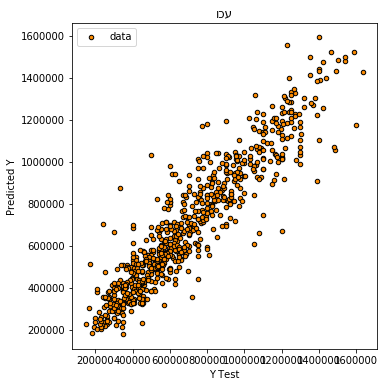

גבעת זאב
Score: 0.7459
MSE sqrt: 231996.2045


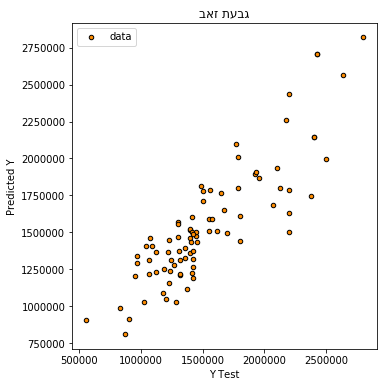

עומר
Score: 0.1602
MSE sqrt: 379997.4276


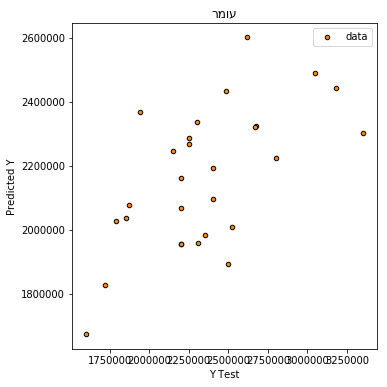

אור יהודה
Score: 0.7939
MSE sqrt: 173972.1565


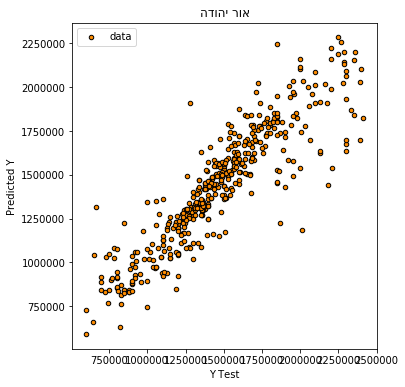

נשר
Score: 0.8586
MSE sqrt: 124226.3181


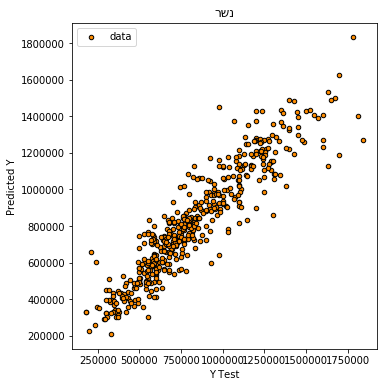

יבנאל
Score: 0.4720
MSE sqrt: 531685.5415


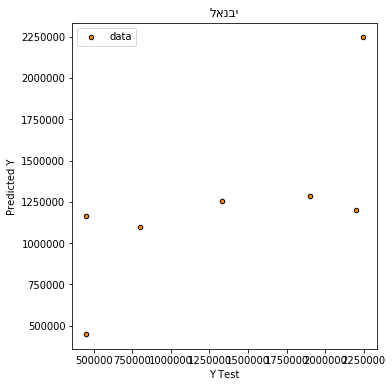

באר שבע
Score: 0.8797
MSE sqrt: 105870.7359


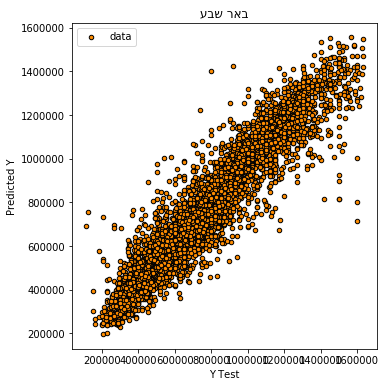

נצרת עילית
Score: 0.7835
MSE sqrt: 133212.0847


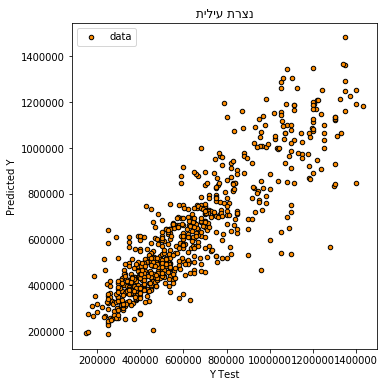

מודיעין מכבים רעות
Score: 0.8354
MSE sqrt: 196443.9053


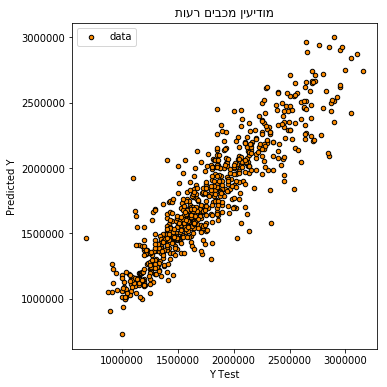

בית שמש
Score: 0.8346
MSE sqrt: 151043.9836


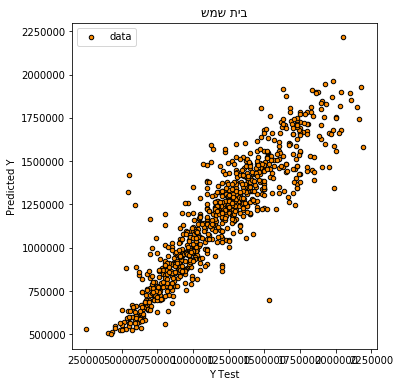

מעלות תרשיחא
Score: 0.7115
MSE sqrt: 165330.9032


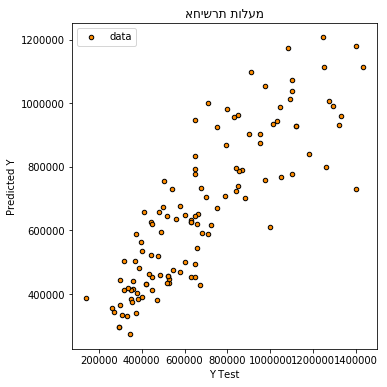

קצרין
Score: 0.6478
MSE sqrt: 155130.0951


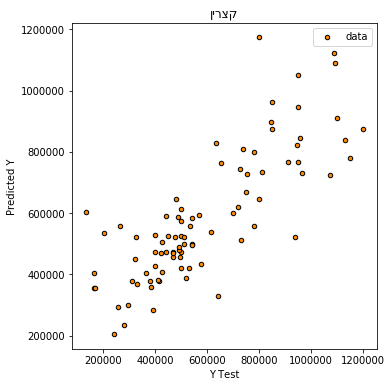

מודיעין עילית
Score: 0.6272
MSE sqrt: 148187.7180


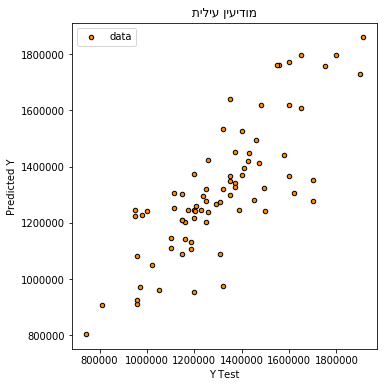

קרית שמונה
Score: 0.6835
MSE sqrt: 93599.2997


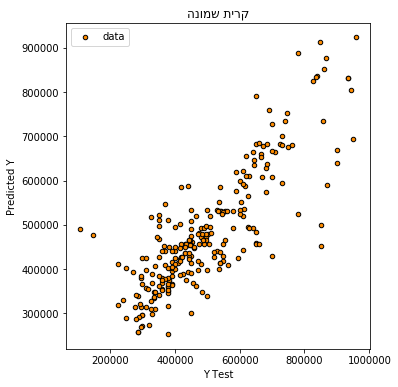

בית שאן
Score: 0.7013
MSE sqrt: 127370.4787


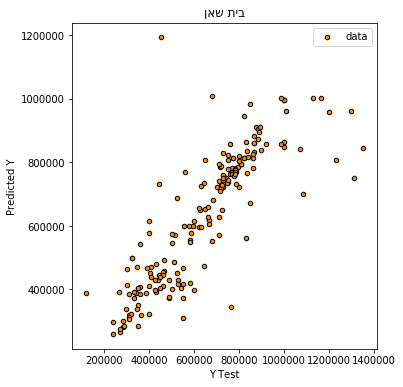

מעלה אדומים
Score: 0.8422
MSE sqrt: 157773.4154


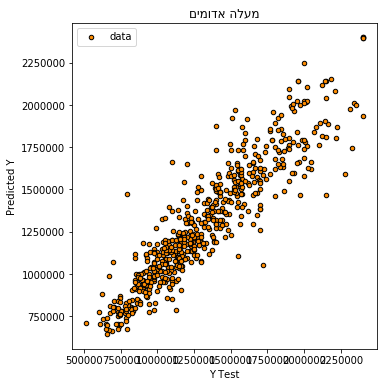

ביתר עילית
Score: 0.8278
MSE sqrt: 164611.2387


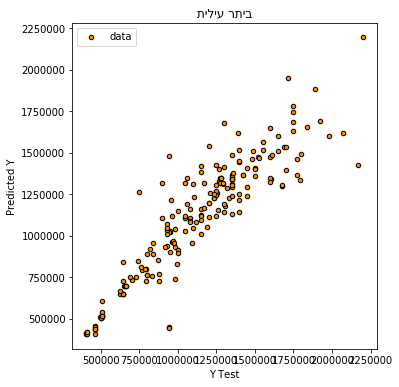

קרית ים
Score: 0.8229
MSE sqrt: 127423.8844


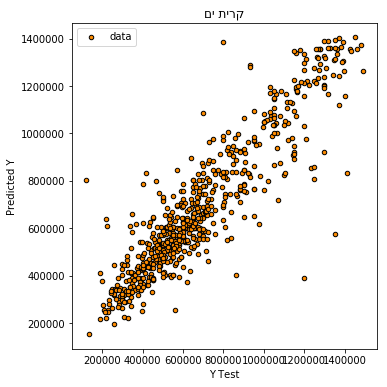

כרמיאל
Score: 0.8572
MSE sqrt: 119195.0871


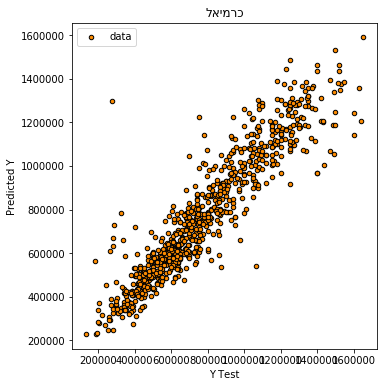

מגדל העמק
Score: 0.8160
MSE sqrt: 119918.1279


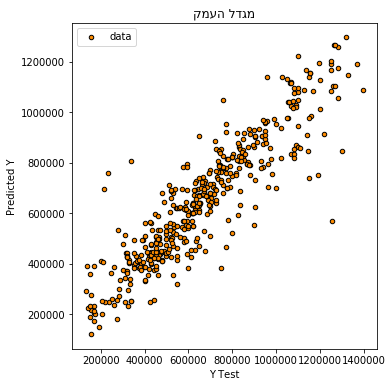

טירת כרמל
Score: 0.8501
MSE sqrt: 154533.1262


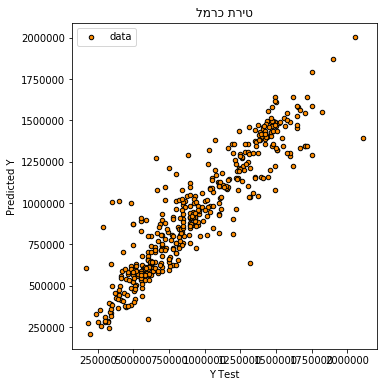

יקנעם עילית
Score: 0.7580
MSE sqrt: 213498.3450


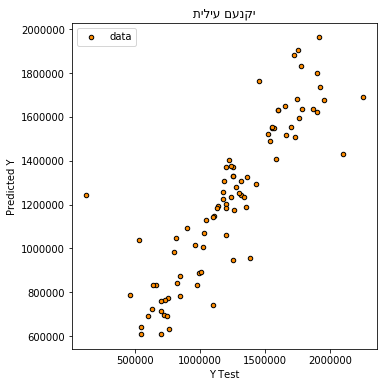

דימונה
Score: 0.7802
MSE sqrt: 97105.3881


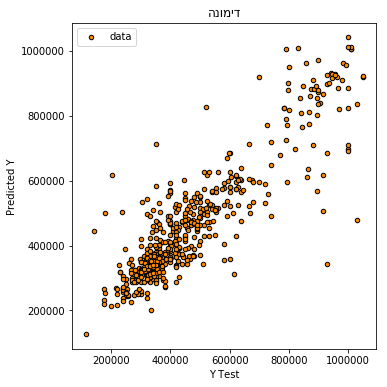

נתיבות
Score: 0.8047
MSE sqrt: 96908.5767


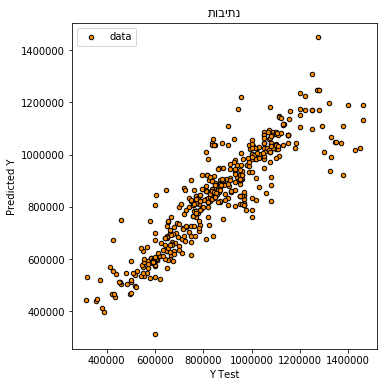

קרית עקרון
Score: 0.6688
MSE sqrt: 269852.1648


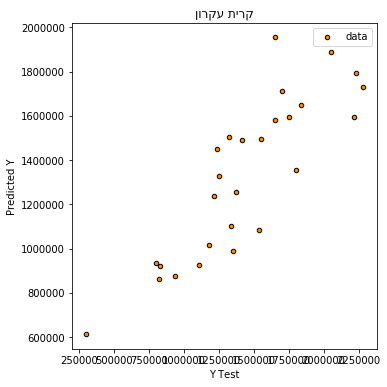

חצור הגלילית
Score: -0.5459
MSE sqrt: 153147.5062


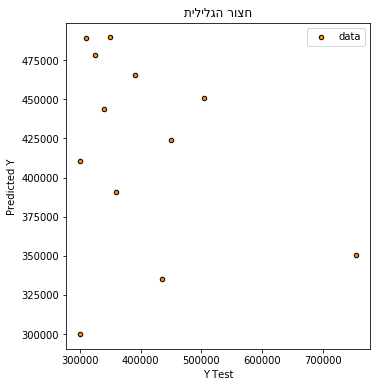

כפר ורדים
Score: 0.2876
MSE sqrt: 283771.3782


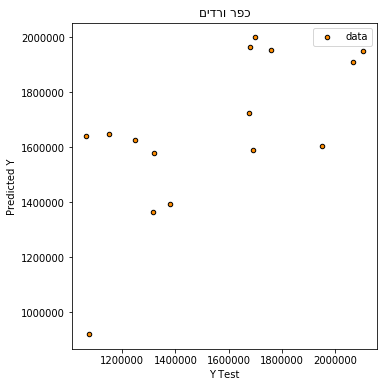

שדרות
Score: 0.7076
MSE sqrt: 121630.9547


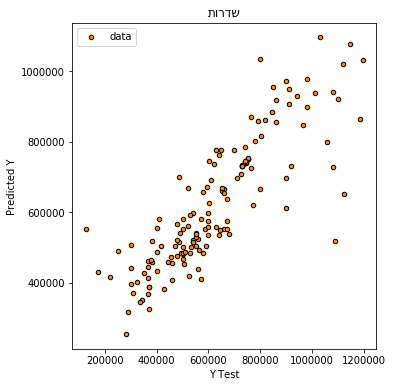

אופקים
Score: 0.7903
MSE sqrt: 92286.7482


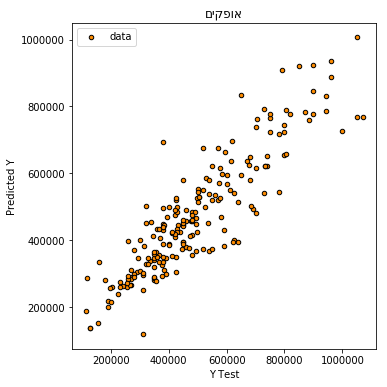

מצפה רמון
Score: 0.5266
MSE sqrt: 164777.4345


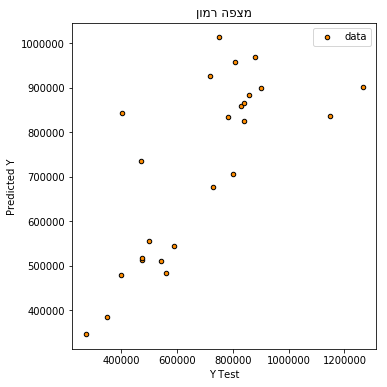

ערד
Score: 0.7996
MSE sqrt: 81168.4234


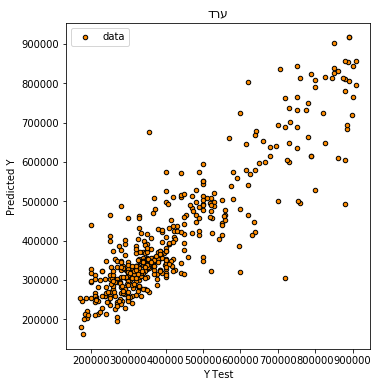

שלומי
Score: 0.6617
MSE sqrt: 152375.4591


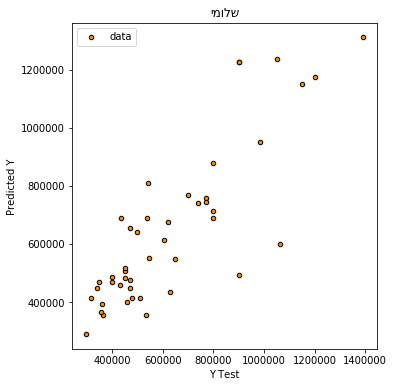

קרני שומרון
Score: 0.5262
MSE sqrt: 149970.9639


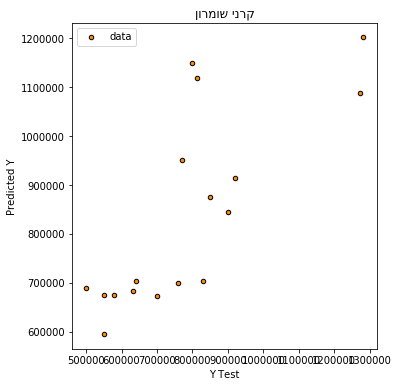

ירוחם
Score: 0.4417
MSE sqrt: 95428.2593


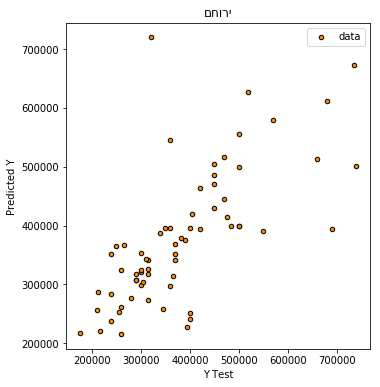

מנחמיה
Score: -0.5702
MSE sqrt: 74247.5243


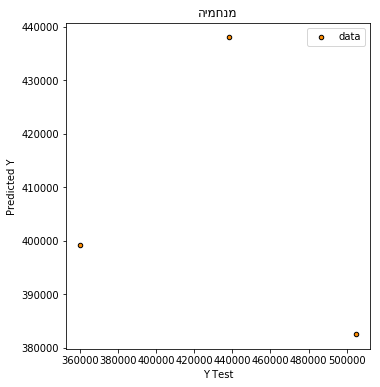

In [8]:
# https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html


for city in cities.keys():
    print(city)
    _df = df.loc[(df['city'] == city)]
    
    _df = remove_outlier(_df, 'final_price')
    
    X = _df[used_features]
    y = _df['final_price']
#     print(X.shape)

    ohe = preprocessing.OneHotEncoder(handle_unknown='ignore')
    X = ohe.fit_transform(X)
    cities[city]["processor"] = ohe
#     print(X.shape)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)
#     # for tuning parameters
#     from sklearn.model_selection import GridSearchCV
#     param_grip = {
#         'learning_rate': [0.1, 0.05, 0.02],
#         'max_depth': [4, 6, 8],
#         'min_samples_leaf': [1, 3],
#         'max_features': [1.0, 0.3]
#     }
#     clf = GradientBoostingRegressor(n_estimators=1000)
#     gs_cv = GridSearchCV(clf, param_grip).fit(X_train, y_train)
#     print(gs_cv.best_params_)
#     continue
    clf = GradientBoostingRegressor(n_estimators=450,
                                    max_depth=8,
                                    learning_rate=0.05,
                                    max_features=0.3,
                                    random_state=1)
    clf.fit(X_train, y_train)
    cities[city]["algo"] = clf
    y_pred = clf.predict(X_test)
    print("Score: %.4f" % clf.score(X_test, y_test))
    mse = mean_squared_error(y_test, clf.predict(X_test))
    cities[city]["mse"] = sqrt(mse)
    print("MSE sqrt: %.4f" % sqrt(mse))
    
    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, s=20, edgecolor="black", c="darkorange", label="data")
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.title(bidialg.get_display(city))
    plt.legend()
    image = BytesIO()
    plt.savefig(image, format='png')
    cities[city]["fig"] = base64.encodestring(image.getvalue())
    plt.show()


In [9]:
# באר שבע
d = {
    'street': ["דוד הראובני", "יצחק רגר", "משה פריבס", "מאיר גרוסמן", "התקווה"], 
    'neighborhood': ["נוה מנחם", "שכונה ב'", "רמות הרכס", "נאות אילן", "מרכז אזרחי"],
    'property_type': ["דירת בבית קומות", "דירת בבית קומות", "דירת בבית קומות", "דירת בבית קומות", "דירת בבית קומות"], 
    'rooms_number': [4, 4, 4, 4, 4], 
    'floor': [2, 10, 2, 2, 2],
    'build_year': [2015, 2019, 2010, 2017, 2019],
    'building_mr': [115, 116, 120, 120, 113],
    'city': ["באר שבע", "באר שבע", "באר שבע", "באר שבע", "באר שבע"],
    'sale_day_year': [2019, 2019, 2019, 2019, 2019]
}
_X = pd.DataFrame(data=d)
print(_X.head())
_X = cities['באר שבע']["processor"].transform(_X)
y_pred = cities['באר שבע']["algo"].predict(_X)
print(y_pred.tolist())


        street neighborhood    property_type  rooms_number  floor  build_year  \
0  דוד הראובני     נוה מנחם  דירת בבית קומות             4      2        2015   
1     יצחק רגר     שכונה ב'  דירת בבית קומות             4     10        2019   
2    משה פריבס    רמות הרכס  דירת בבית קומות             4      2        2010   
3  מאיר גרוסמן    נאות אילן  דירת בבית קומות             4      2        2017   
4       התקווה   מרכז אזרחי  דירת בבית קומות             4      2        2019   

   building_mr     city  sale_day_year  
0          115  באר שבע           2019  
1          116  באר שבע           2019  
2          120  באר שבע           2019  
3          120  באר שבע           2019  
4          113  באר שבע           2019  
[1069199.5826868538, 1025730.6157909613, 1053456.5002428922, 1042527.4598020958, 1328987.366300862]


In [10]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix


# for city in cities.keys():
#     print(city)
#     _df = df.loc[(df['city'] == city)]
    
#     _df = remove_outlier(_df, 'final_price')
    
#     print(_df.shape)
#     X = _df[used_features]
#     y = _df['final_price']
#     y, info = pd.qcut(np.array(y), 10, retbins=True)
#     print(info)
#     y = pd.DataFrame(y.codes)
    
#     ohe = preprocessing.OneHotEncoder()
#     X = ohe.fit_transform(X)

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)

#     rfc = RandomForestClassifier(n_estimators=150, random_state=1)
#     rfc.fit(X_train,y_train)

#     predictions = rfc.predict(X_test)
#     print(classification_report(y_test,predictions))
#     print(confusion_matrix(y_test,predictions))


In [11]:
# saving objects
for city, values in cities.items():
    folder = os.path.join("pickles", city)
    if not os.path.exists(folder):
        os.mkdir(folder)
    joblib.dump(values["processor"], os.path.join(folder, "processor.joblib"))
    joblib.dump(values["algo"], os.path.join(folder, "algo.joblib"))

    with open(os.path.join(folder, "algo_fig.png"), 'w') as fig:
        fig.write(values["fig"].decode("utf-8"))

    with open(os.path.join(folder, "algo_mse.txt"), 'w') as fig:
        fig.write(str(values["mse"]))


In [12]:
# to load:
cities = {city: {
    "processor": joblib.load(os.path.join("pickles", city, "processor.joblib")), 
    "algo": joblib.load(os.path.join("pickles", city, "algo.joblib"))
} for city in cities}